In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import pickle

import warnings
warnings.filterwarnings("ignore")

In [74]:
train_dataset = pd.read_csv('data/Train-dataset.csv')
test_dataset = pd.read_csv('data/Test-dataset.csv')

In [3]:
display(train_dataset.info())
display(train_dataset.head(5))
display(train_dataset.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45749 entries, 0 to 45748
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL                      45749 non-null  object 
 1   X                         45749 non-null  float64
 2   Y                         45749 non-null  float64
 3   MD                        45749 non-null  float64
 4   GR                        45749 non-null  float64
 5   RT                        45749 non-null  float64
 6   CN                        45749 non-null  float64
 7   DEN                       45749 non-null  float64
 8   DEPOSITIONAL_ENVIRONMENT  45749 non-null  object 
 9   LITH_NAME                 45749 non-null  object 
 10  LITH_CODE                 45749 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 3.8+ MB


None

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.939,3.166,0.250,2.344,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.166,3.135,0.246,2.352,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.055,3.089,0.244,2.352,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.352,3.042,0.242,2.355,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.614,3.003,0.241,2.369,Marine,Sandy marl,1300


,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
45744,Well-10,3.0,0.0,2275.2,103.6016,1.0789,0.29558,2.3783,Marine,Clay marl,400
45745,Well-10,3.0,0.0,2275.3,102.8472,1.0683,0.29264,2.3651,Marine,Clay marl,400
45746,Well-10,3.0,0.0,2275.4,102.5699,1.0790,0.29425,2.3531,Marine,Clay marl,400
45747,Well-10,3.0,0.0,2275.5,102.7901,1.1045,0.30096,2.3430,Marine,Clay marl,400
45748,Well-10,3.0,0.0,2275.6,103.5419,1.1360,0.31172,2.3361,Marine,Clay marl,400


In [4]:
train_dataset

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.9390,3.1660,0.25000,2.3440,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.1660,3.1350,0.24600,2.3520,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.0550,3.0890,0.24400,2.3520,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.3520,3.0420,0.24200,2.3550,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.6140,3.0030,0.24100,2.3690,Marine,Sandy marl,1300
...,...,...,...,...,...,...,...,...,...,...,...
45744,Well-10,3.0000,0.0000,2275.2,103.6016,1.0789,0.29558,2.3783,Marine,Clay marl,400
45745,Well-10,3.0000,0.0000,2275.3,102.8472,1.0683,0.29264,2.3651,Marine,Clay marl,400
45746,Well-10,3.0000,0.0000,2275.4,102.5699,1.0790,0.29425,2.3531,Marine,Clay marl,400
45747,Well-10,3.0000,0.0000,2275.5,102.7901,1.1045,0.30096,2.3430,Marine,Clay marl,400


In [67]:
train_dataset = train_dataset.replace('Well-1', 'Well-01')
train_dataset = train_dataset.replace('Well-2', 'Well-02')
train_dataset = train_dataset.replace('Well-3', 'Well-03')
train_dataset = train_dataset.replace('Well-4', 'Well-04')
train_dataset = train_dataset.replace('Well-5', 'Well-05')
train_dataset = train_dataset.replace('Well-6', 'Well-06')
train_dataset = train_dataset.replace('Well-7', 'Well-07')
train_dataset = train_dataset.replace('Well-8', 'Well-08')
train_dataset = train_dataset.replace('Well-9', 'Well-09')
train_dataset = train_dataset.sort_values('WELL')

print(train_dataset)

          WELL       X       Y      MD        GR      RT       CN     DEN  \
0      Well-01  0.8179  2.9814  1602.0   83.9390  3.1660  0.25000  2.3440   
44     Well-01  0.8179  2.9814  1606.4   89.3680  3.2890  0.24600  2.3910   
1      Well-01  0.8179  2.9814  1602.1   84.1660  3.1350  0.24600  2.3520   
2      Well-01  0.8179  2.9814  1602.2   85.0550  3.0890  0.24400  2.3520   
3      Well-01  0.8179  2.9814  1602.3   86.3520  3.0420  0.24200  2.3550   
...        ...     ...     ...     ...       ...     ...      ...     ...   
16316  Well-11  0.7564  1.9833  1522.5   94.0471  3.0908  0.27578  2.4061   
16317  Well-11  0.7564  1.9833  1522.6   94.1813  3.1078  0.27590  2.4062   
16318  Well-11  0.7564  1.9833  1522.7   93.8128  3.1184  0.27336  2.3997   
16310  Well-11  0.7564  1.9833  1521.9   89.3917  2.9597  0.27439  2.3773   
11375  Well-11  0.7564  1.9833  1028.4  103.9228  3.6159  0.34224  2.1494   

      DEPOSITIONAL_ENVIRONMENT        LITH_NAME  LITH_CODE  D_Env  
0      

In [76]:
wells = train_dataset['WELL'].unique()
print(wells)

wells = test_dataset['WELL'].unique()
print(wells)

['Well-1' 'Well-9' 'Well-4' 'Well-2' 'Well-3' 'Well-8' 'Well-5' 'Well-6'
 'Well-11' 'Well-7' 'Well-10']
['Well-X' 'Well-Y' 'Well-Z']


In [72]:
for well in wells:
    print(well + "  " + str(len(train_dataset[train_dataset['WELL'] == well])))

Well-1  90
Well-9  1309
Well-4  175
Well-2  9
Well-3  87
Well-8  1058
Well-5  811
Well-6  4528
Well-11  11125
Well-7  10370
Well-10  16187


1309


(1802.7, 1102.0)

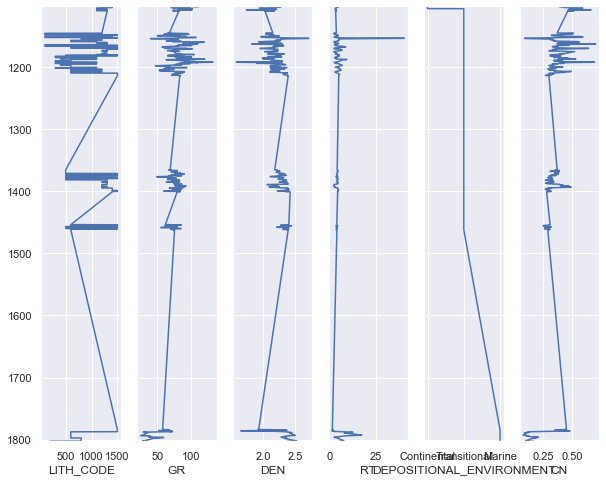

In [93]:
#see how well logging curves look by depth parameter (MD) for different wells
well_data = train_dataset[train_dataset['WELL'] == 'Well-9']
# well_data = test_dataset[test_dataset['WELL'] == 'Well-Y']
print(len(well_data))

fig, axs = plt.subplots(1, len(well_data.columns)-5, figsize=(10, 8), sharey=True)
#fig, axs = plt.subplots(1, len(well_data.columns)-4, figsize=(10, 8), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['WELL',
                                                     'MD',
                                                     'LITH_NAME',
                                                      'X',
                                                      'Y'])):
    axs[ic].plot(well_data[col], well_data['MD'])
    axs[ic].set_xlabel(col)
    
axs[0].set_ylim(well_data['MD'].values[-1], well_data['MD'].values[0])

In [8]:
train_dataset['LITH_NAME'].value_counts()

Sandstone          11572
Clay marl           8054
Clay                7716
Clay sandstone      6496
Sandy marl          5677
Coal                2547
Marl                1236
Marly sandstone      889
Tight                693
Coal clay            443
Siltstone clay       340
Marl clay             83
Siltstone/Loess        3
Name: LITH_NAME, dtype: int64

In [9]:
lithology_color = {100: '#997950',
                    200: '#cccccc',
                    300: '#ffff00',
                    400: '#ffccff',
                    500: '#006600',
                    600: '#666600',
                    700: '#F8DE7E',
                    800: '#999DA0',
                    900: '#9933ff',
                    1000: '#ff6600',
                    1100: '#000000',
                    1200: '#98FB98',
                    1300: '#ff9999',
                    1400: '#CEB180',
                    1500: '#3BB143'
                    }

lithology_key = {100: 'Clay',
                 200: 'Siltstone/Loess',
                 300: 'Marl',
                 400: 'Clay marl',
                 500: 'Clay sandstone',
                 600: 'Sandstone',
                 700: 'Limestone',
                 800: 'Tight',
                 900: 'Dolomite',
                 1000: 'Coal',
                 1100: 'Coal clay',
                 1200: 'Marly sandstone',
                 1300: 'Sandy marl',
                 1400: 'Marl clay',
                 1500: 'Siltstone clay'
                  }

In [10]:
def autolabel(ax, bars, labels):
    """Attach a text label above each bar."""
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.annotate('{}'.format(label),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

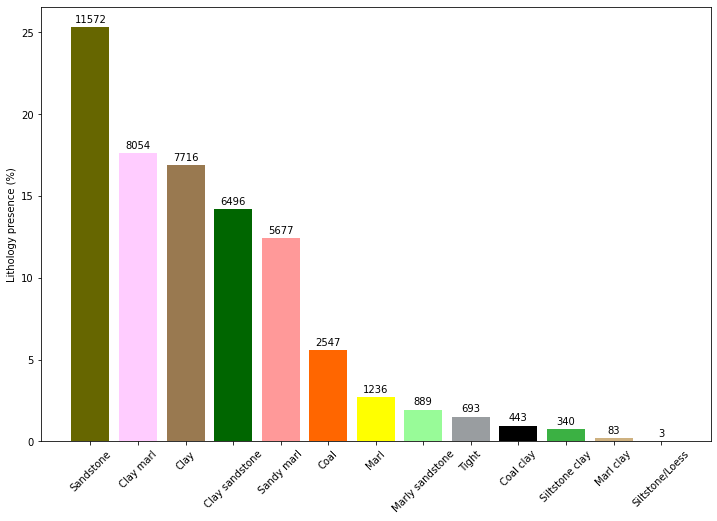

In [11]:
counts = train_dataset['LITH_CODE'].value_counts()
names = []
percentage = []
numbers = []
colors = []
N = train_dataset['LITH_CODE'].shape[0]
for item in counts.iteritems():
    names.append(lithology_key[item[0]])
    percentage.append(float(item[1]) / N*100)
    numbers.append(int(item[1]))
    colors.append(lithology_color[item[0]])
    
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
bar = ax.bar(x=np.arange(len(names)), height=percentage, color=colors)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (%)')

autolabel(ax, bar, numbers)

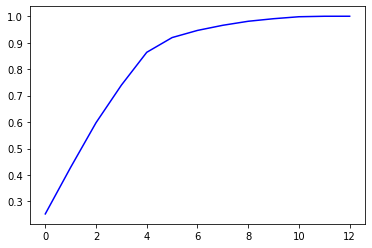

In [36]:
counts = train_dataset['LITH_CODE'].value_counts()


cumulative = np.cumsum(counts).values
cumulative = cumulative / np.max(cumulative)

plt.plot(cumulative, c='blue')

In [37]:
MAPPING = {
    'Continental': 1,
    'Transitional': 2,
    'Marine': 3,
}

train_dataset['D_Env']=train_dataset['DEPOSITIONAL_ENVIRONMENT'].apply(lambda x: MAPPING[x])
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45749 entries, 0 to 45748
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL                      45749 non-null  object 
 1   X                         45749 non-null  float64
 2   Y                         45749 non-null  float64
 3   MD                        45749 non-null  float64
 4   GR                        45749 non-null  float64
 5   RT                        45749 non-null  float64
 6   CN                        45749 non-null  float64
 7   DEN                       45749 non-null  float64
 8   DEPOSITIONAL_ENVIRONMENT  45749 non-null  object 
 9   LITH_NAME                 45749 non-null  object 
 10  LITH_CODE                 45749 non-null  int64  
 11  D_Env                     45749 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 4.2+ MB


In [39]:
Feature = train_dataset[['MD','GR', 'RT', 'DEN', 'CN','D_Env']]

In [40]:
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)

In [41]:
y = train_dataset['LITH_CODE']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36599, 6) (36599,)
Test set: (9150, 6) (9150,)


In [43]:
def show_conf_matrix(y_test, y_pred, classes):
    
    # Calculate confusion matrix
    conf = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12,12))
    sns.set(font_scale=1)
    sns.heatmap(conf, annot=True, annot_kws={"size": 16}, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted value')
    plt.ylabel('True value')
    
    plt.show()

In [44]:
target_lithologys = []
labels = np.sort(y_test.unique())

for l_code in labels:
    lithology = lithology_key[l_code]
    target_lithologys.append(lithology)

print(labels)
print(target_lithologys)

[ 100  200  300  400  500  600  800 1000 1100 1200 1300 1400 1500]
['Clay', 'Siltstone/Loess', 'Marl', 'Clay marl', 'Clay sandstone', 'Sandstone', 'Tight', 'Coal', 'Coal clay', 'Marly sandstone', 'Sandy marl', 'Marl clay', 'Siltstone clay']


In [48]:
#fitting the K parameter

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

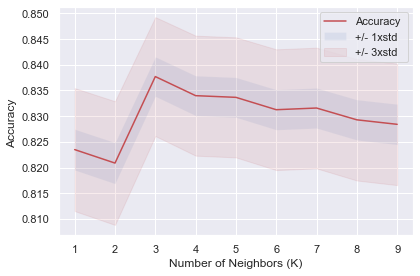

The highest accuracy 0.84 was obtained with k= 3 .


In [49]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color='r')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


print( "The highest accuracy", round((mean_acc.max()),2), "was obtained with k=",mean_acc.argmax()+1,"." ) 

Train set accuracy:  0.91
Test set accuracy:  0.84


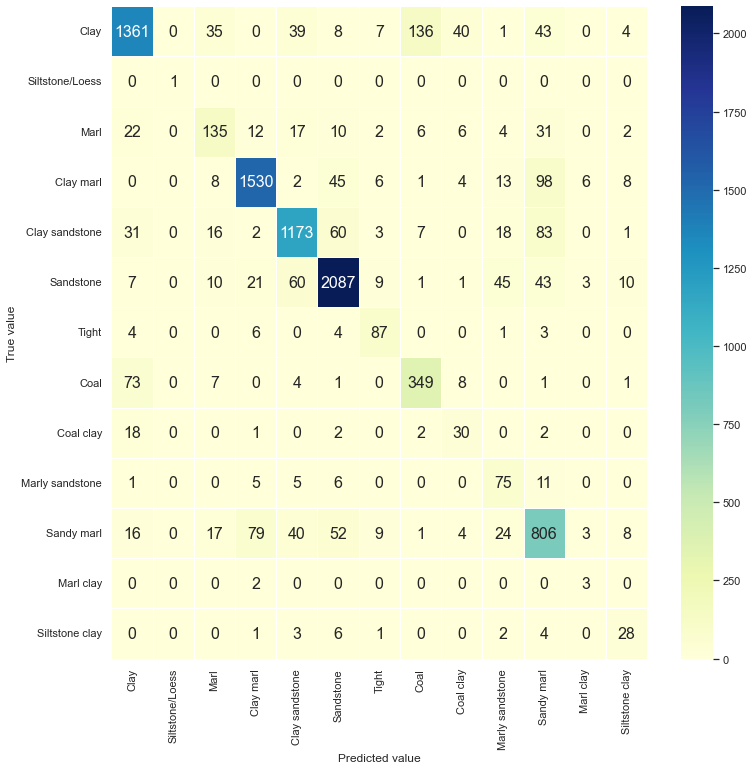

Test set classification report
----------------------------------------------------------------------------------
                 precision    recall  f1-score   support

           Clay       0.81      0.89      0.85      1533
Siltstone/Loess       1.00      1.00      1.00         1
           Marl       0.55      0.59      0.57       228
      Clay marl       0.89      0.92      0.91      1659
 Clay sandstone       0.84      0.87      0.86      1343
      Sandstone       0.91      0.91      0.91      2281
          Tight       0.83      0.70      0.76       124
           Coal       0.79      0.69      0.74       503
      Coal clay       0.55      0.32      0.41        93
Marly sandstone       0.73      0.41      0.52       183
     Sandy marl       0.76      0.72      0.74      1125
      Marl clay       0.60      0.20      0.30        15
 Siltstone clay       0.62      0.45      0.52        62

       accuracy                           0.84      9150
      macro avg       0.76   

In [50]:
model = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

y_predict = model.predict(X_test)

print("Train set accuracy: ", round(metrics.f1_score(y_train, model.predict(X_train), average = 'micro'), 2))
print("Test set accuracy: ", round(metrics.f1_score(y_test, y_predict, average = 'micro'), 2))

show_conf_matrix(y_predict, y_test, target_lithologys)

print('==================================================================================')
print('Test set classification report')
print('----------------------------------------------------------------------------------')
print(classification_report(y_test, y_predict, labels=labels, target_names=target_lithologys, zero_division=0))
print('==================================================================================')

In [ ]:
# Save the model to file in the current working directory

# Pkl_Filename = "KNN_Model.pkl"  
# # Pkl_Filename = '/kaggle/output/working/KNN_Model.pkl' 


# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(model, file)

# Validate your model

In [ ]:
test_dataset = pd.read_csv('/kaggle/input/eestech-challenge-2022/Test-dataset.csv')

display(test_dataset.info())
display(test_dataset.head(5))
display(test_dataset.tail(5))

In [ ]:
test_dataset['D_Env']=test_dataset['DEPOSITIONAL_ENVIRONMENT'].apply(lambda x: MAPPING[x])

In [ ]:
test_dataset

In [ ]:
test_feature = test_dataset[['MD','GR', 'RT', 'DEN', 'CN','D_Env']]

In [ ]:
# Testing feature
X_test = test_feature

# Normalizing Test Data
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [ ]:
target_lithologys = []
labels = np.sort(y_test.unique())

for l_code in labels:
    lithology = lithology_key[l_code]
    target_lithologys.append(lithology)

print(labels)
print(target_lithologys)

In [ ]:
# Pkl_Filename = "KNN_Model.pkl"

# with open(Pkl_Filename, 'rb') as file:  
#     model = pickle.load(file)

In [ ]:
test_yhat = model.predict(X_test)

In [ ]:
test_yhat

In [ ]:
test_dataset['LITH_CODE'] = test_yhat

In [ ]:
test_dataset

In [ ]:
submission = test_dataset[['Id','LITH_CODE']]

In [ ]:
submission.to_csv('submission.csv', index=False)